In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv") 
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [3]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_original=train.copy() 
test_original=test.copy()


In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.shape

(614, 13)

In [9]:
test.shape

(367, 12)

In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

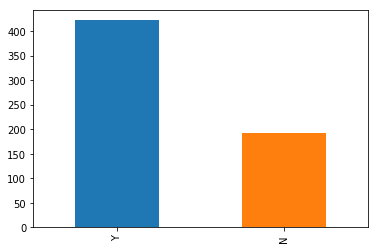

In [11]:
train['Loan_Status'].value_counts().plot.bar()

In [12]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
train[train['Loan_Status']=='Y']['Gender'].value_counts()

Male      339
Female     75
Name: Gender, dtype: int64

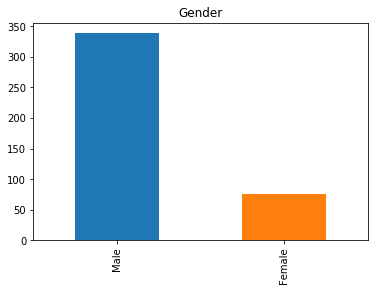

In [14]:
train[train['Loan_Status']=='Y']['Gender'].value_counts().plot.bar( title= 'Gender')


In [15]:
 train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [16]:
train[train['Loan_Status']=='Y']['Married'].value_counts()

Yes    285
No     134
Name: Married, dtype: int64

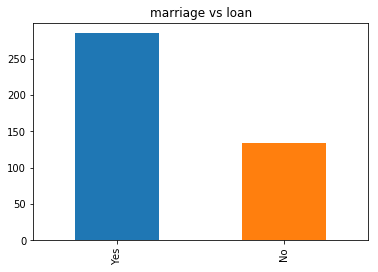

In [17]:
train[train['Loan_Status']=='Y']['Married'].value_counts().plot.bar(title="marriage vs loan")

In [18]:
 train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

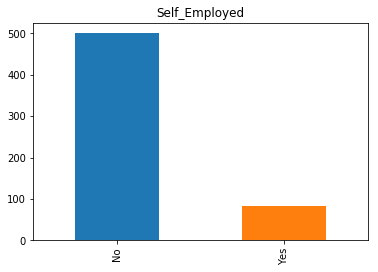

In [19]:
 train['Self_Employed'].value_counts().plot.bar(title= 'Self_Employed') 

In [20]:
train[train['Loan_Status']=='Y']['Self_Employed'].value_counts()

No     343
Yes     56
Name: Self_Employed, dtype: int64

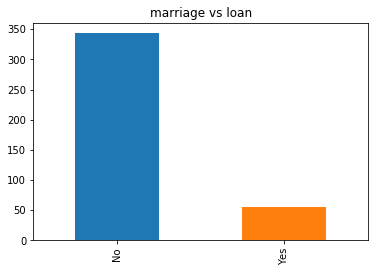

In [21]:
train[train['Loan_Status']=='Y']['Self_Employed'].value_counts().plot.bar(title="marriage vs loan")

In [22]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [23]:
train[train['Loan_Status']=='Y']['Credit_History'].value_counts()

1.0    378
0.0      7
Name: Credit_History, dtype: int64

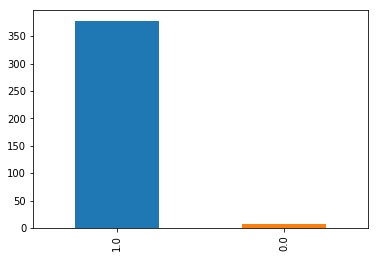

In [24]:
train[train['Loan_Status']=='Y']['Credit_History'].value_counts().plot.bar()

It is very interesting to know that only 7 people having the credit history==0 are granted loan. Lets further look at their other data

In [25]:
train[(train['Loan_Status']=='Y') & (train['Credit_History']==0.00)] 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
201,LP001677,Male,No,2,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,Y
267,LP001882,Male,Yes,3+,Graduate,No,4333,1811.0,160.0,360.0,0.0,Urban,Y
326,LP002068,Male,No,0,Graduate,No,4917,0.0,130.0,360.0,0.0,Rural,Y
453,LP002449,Male,Yes,0,Graduate,No,2483,2466.0,90.0,180.0,0.0,Rural,Y
527,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,Y


In [26]:

train[train['ApplicantIncome']==max(train['ApplicantIncome'])]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


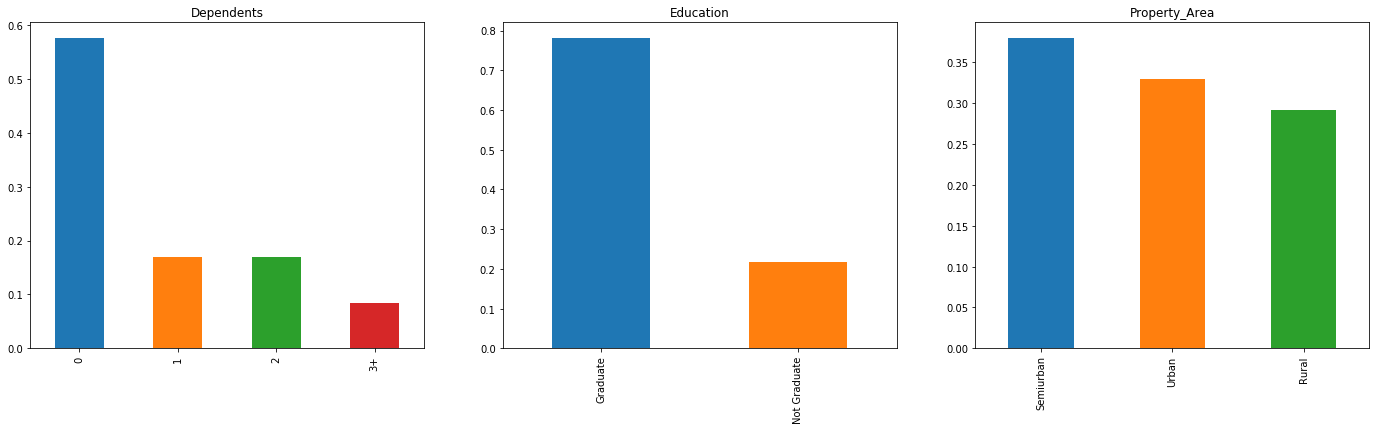

In [27]:
plt.figure(1)
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

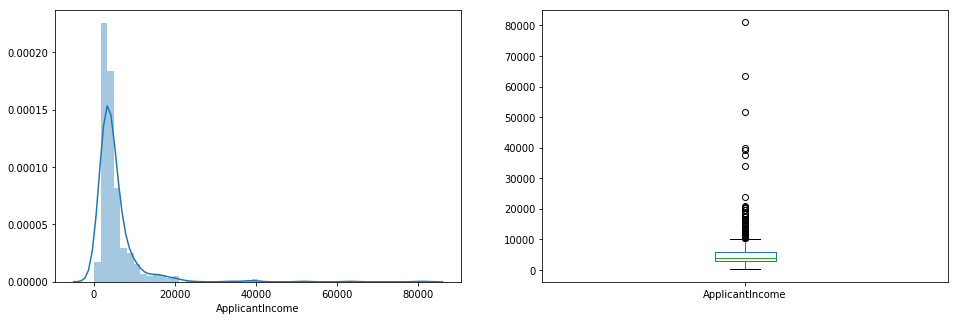

In [28]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome'])
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Text(0.5, 0.98, '')

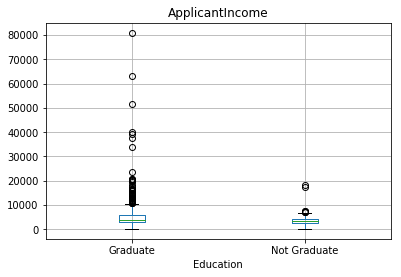

In [29]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")



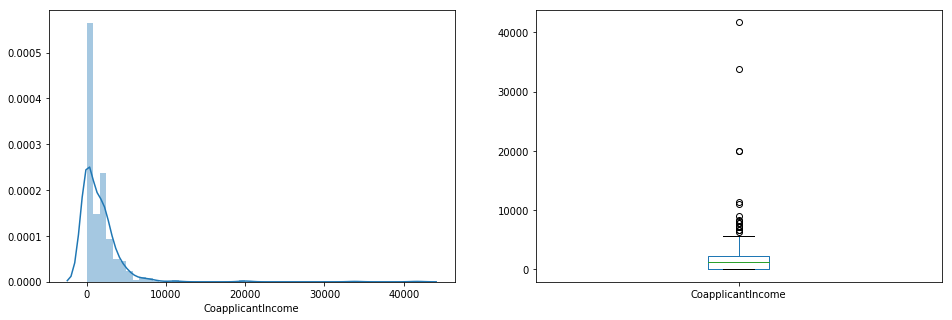

In [30]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

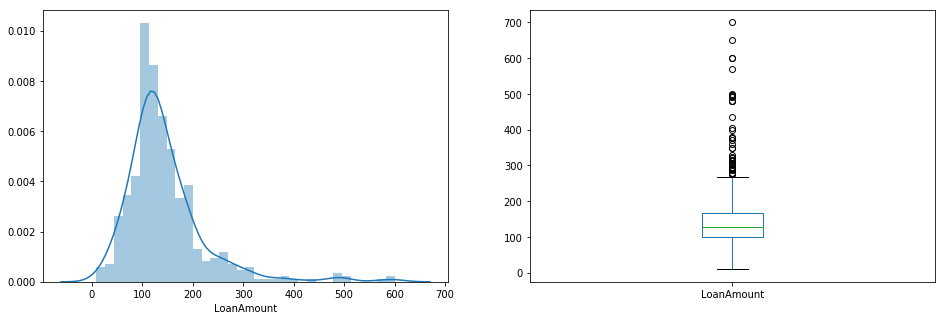

In [31]:
plt.figure(1) 
plt.subplot(121) 
df=train.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

In [35]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'],margins=True) 
Gender


Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


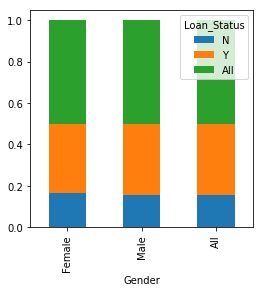

In [36]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

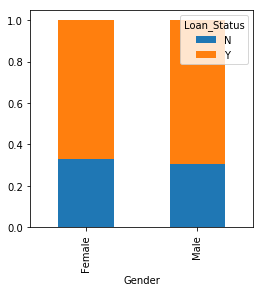

In [33]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))


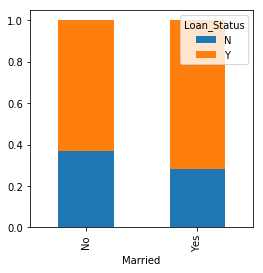

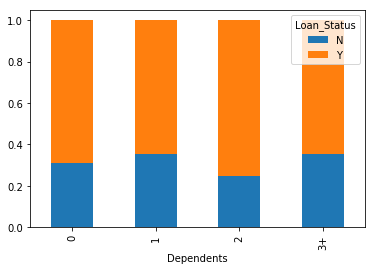

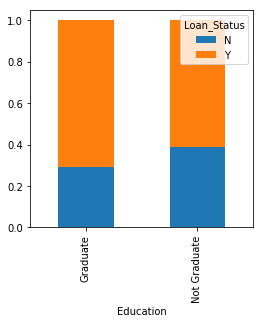

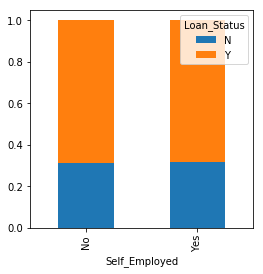

In [38]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()


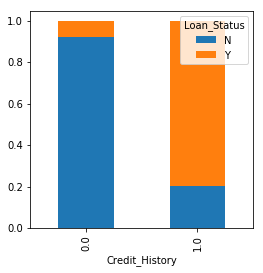

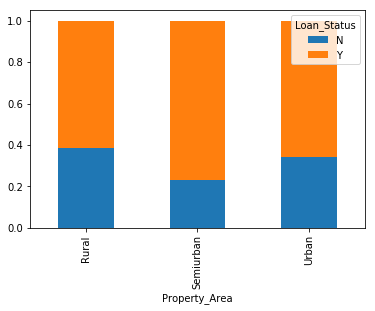

In [39]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

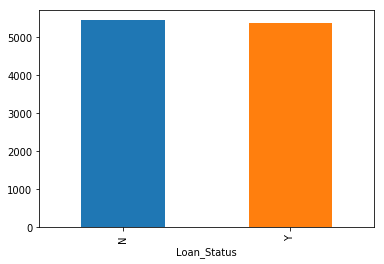

In [41]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

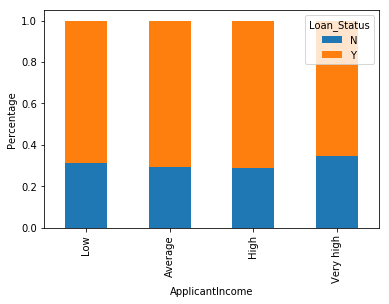

In [42]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

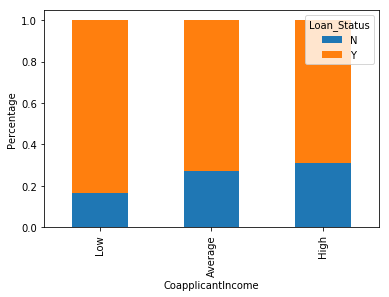

In [44]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

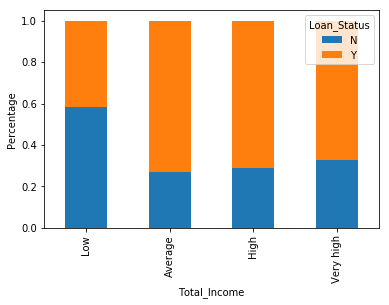

In [45]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

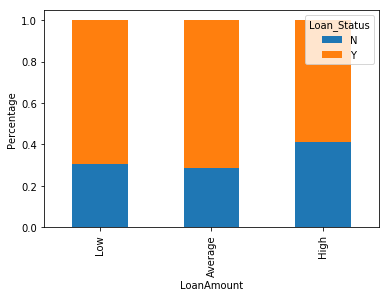

In [48]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [50]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

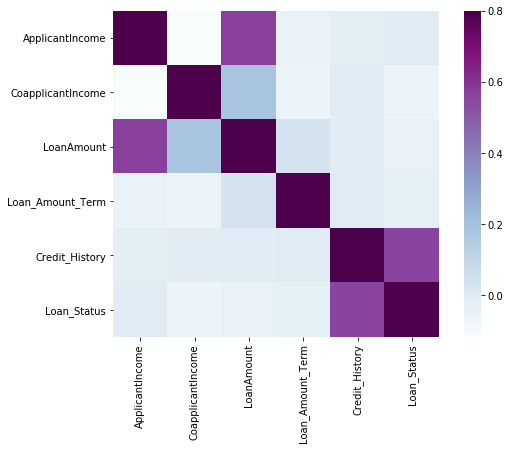

In [52]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [53]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64